In [7]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
text = "This is a test document."
query_result = embeddings.embed_query(text)
print(query_result)
print(len(query_result))

[-0.04895181208848953, -0.039862047880887985, -0.021562783047556877, 0.009908565320074558, -0.038103919476270676, 0.012684371322393417, 0.043494489043951035, 0.07183389365673065, 0.009748607873916626, -0.006987079046666622, 0.06352807581424713, -0.030322592705488205, 0.013839476741850376, 0.025805914774537086, -0.0011363145895302296, -0.014563580974936485, 0.04164031147956848, 0.036228299140930176, -0.026800835505127907, 0.025120723992586136, -0.024978602305054665, -0.004533266182988882, -0.0266671534627676, 0.004100719932466745, -0.052048057317733765, -0.009930484928190708, -0.05206530913710594, 0.00899212434887886, -0.03830048441886902, -0.044058457016944885, -0.0042044175788760185, 0.07047972828149796, 0.005133945494890213, -0.07161542028188705, 1.6975311609712662e-06, -0.0060477363876998425, -0.011076436378061771, 0.017513375729322433, -0.022299861535429955, 0.040954940021038055, 0.03379020839929581, 0.05665038153529167, -0.07114941626787186, 0.04097661003470421, -0.005906058009713

In [8]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="nomic-ai/nomic-embed-text-v1.5",
    model_kwargs={"trust_remote_code": True}
)

text = "This is a test document."
query_result = embeddings.embed_query(text)
print(query_result)
print(len(query_result))


<All keys matched successfully>


[0.70554119348526, 0.4733888506889343, -3.6945583820343018, -1.0959100723266602, 0.6916860938072205, -0.7252405285835266, 0.40410640835762024, -0.06588249653577805, 0.23866493999958038, -0.7481761574745178, 0.29859426617622375, 0.72902911901474, 0.3696848154067993, -0.41067612171173096, -0.3627191185951233, -0.9940323233604431, 0.7113043665885925, -1.6113719940185547, 0.09332021325826645, 0.04567504674196243, 0.10984066873788834, 0.10997319966554642, -2.0760669708251953, -0.2516222596168518, 2.5856103897094727, 0.6344125270843506, -1.7511844635009766, 0.1851201355457306, -1.5790188312530518, -1.0607388019561768, 0.6901822090148926, -0.14475809037685394, 0.949995756149292, -0.42626526951789856, -0.5214133858680725, -2.2995524406433105, 0.3450394868850708, 0.9812828302383423, -0.1333187371492386, 0.6769298911094666, -0.2583785951137543, 0.6046332716941833, -1.1301311254501343, -0.6406272053718567, 0.7976539134979248, 0.7306952476501465, -0.03462979197502136, 1.1317400932312012, -0.027639

In [2]:
from pinecone import Pinecone
import os
from pinecone import ServerlessSpec
from langchain_pinecone import PineconeVectorStore
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from dotenv import load_dotenv
load_dotenv()

pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

index_name = "cgu-test-index"  

if not pc.has_index(index_name):
    pc.create_index(
        name=index_name,
        dimension=768,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )

index = pc.Index(index_name)
embeddings = HuggingFaceEmbeddings(
    model_name="nomic-ai/nomic-embed-text-v1.5",
    model_kwargs={"trust_remote_code": True}
)

vector_store = PineconeVectorStore(index=index, embedding=embeddings)

d:\abhi_project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<All keys matched successfully>


In [2]:
retriever = vector_store.as_retriever(search_type="mmr",
    search_kwargs={
        "k": 4,
        "fetch_k": 20,
        "lambda_mult": 0.6
    })

In [3]:
index_name = "cgu-examination-index"  

if not pc.has_index(index_name):
    pc.create_index(
        name=index_name,
        dimension=768,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )

index = pc.Index(index_name)
embeddings = HuggingFaceEmbeddings(
    model_name="nomic-ai/nomic-embed-text-v1.5",
    model_kwargs={"trust_remote_code": True}
)

exam_vector_store = PineconeVectorStore(index=index, embedding=embeddings)

<All keys matched successfully>


In [4]:
exam_retriever = exam_vector_store.as_retriever(search_type="mmr",
    search_kwargs={
        "k": 4,
        "fetch_k": 20,
        "lambda_mult": 0.5
    })

In [5]:
index_name = "cgu-notice-index"  

if not pc.has_index(index_name):
    pc.create_index(
        name=index_name,
        dimension=768,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )

index = pc.Index(index_name)
embeddings = HuggingFaceEmbeddings(
    model_name="nomic-ai/nomic-embed-text-v1.5",
    model_kwargs={"trust_remote_code": True}
)

notice_board_store = PineconeVectorStore(index=index, embedding=embeddings)

<All keys matched successfully>


In [6]:
notice_retriever = notice_board_store.as_retriever(search_type="mmr",
    search_kwargs={
        "k": 4,
        "fetch_k": 20,
        "lambda_mult": 0.5
    })

In [7]:
from langchain.tools import tool

@tool
def retrieve_blog_posts(query: str) -> str:
    """
    Search and return official university information, including:
    - University overview, rankings, and accreditations
    - Admissions process and entrance exams
    - Eligibility criteria for all courses
    - Scholarships and education loans
    - Office roles, responsibilities, and contact details
    - Fees, payments, and refund policies
    - Campus policies, facilities, and student life
    - International student admissions and requirements
    - Placements, recruiters, and career outcomes
    """
    docs = retriever.invoke(query)
    return "\n\n".join([doc.page_content for doc in docs])

retriever_tool = retrieve_blog_posts

In [1]:
retriever_tool.invoke({"query": "fee structure for Mtech"})

NameError: name 'retriever_tool' is not defined

In [8]:
@tool
def retrieve_examination_cell_doc(query: str) -> str:
    """
    Search and return official university exam notifications,
    schedules, admit card releases, result notices, and 
    examination circulars .
    """
    docs = exam_retriever.invoke(query)
    return "\n\n".join([doc.page_content for doc in docs])

examination_cell_retriever = retrieve_examination_cell_doc

In [64]:
print(examination_cell_retriever.invoke({"query": "MID Term Examination of 6th Semester CSE & its Allied Branches."}))

--- Page 1 ---
Here is a detailed summary of the provided document page:

**Institution:** C.V. RAMAN GLOBAL UNIVERSITY, BHUBANESWAR
**Reference Number:** CGU/EXAM/0111 /2025
**Date:** 27.12.2025

**Heading:** NOTICE

**Subject:** Conduct of MID Term Examination of 6th Semester CSE & its Allied Branches.

**Notification Content:**
This notice informs all concerned that the MID Term Examination for the 6th Semester CSE and its Allied Branches will be held on 31.12.2025 (Wednesday) from 11:30 AM to 12:30 PM.

**Examination Schedule Table:**

| Sem | Course  | Date of Exam    | Timing of Examination | Subject                                                                                             |
|-----|---------|-----------------|-----------------------|-----------------------------------------------------------------------------------------------------|
| 6th | B.Tech  | 31.12.2025 (Wednesday) | 11:30AM to 12:30PM    | Java for Competitive Programming and Algorithms (CS315) / Pytho

In [9]:
@tool
def retrieve_notice_board_doc(query: str) -> str:
    """
    Search and return official university notices and announcements
    from the CGU Odisha Notice Board ,
    including:
    - Admit card distribution updates
    - Time table for any course/Branch
    - Notifications about academic activities
    - Convocation and award announcements
    - Other official circulars and events
    """
    docs = notice_retriever.invoke(query)
    return "\n\n".join([doc.page_content for doc in docs])

notice_board_doc = retrieve_notice_board_doc

In [66]:
print(notice_board_doc.invoke("Academic Calendar-even Sem-2025-26"))

--- Page 1 ---
Here is a detailed, factual summary of the provided document page:

**Document Title:** C. V. Raman Global University, Bhubaneswar
**Academic Calendar:** 2025-26
**Target Audience:** For 4th/6th/8th Semester Students

**Headings:**

*   Events
*   For all UG/PG/Ph.D Programmes
*   STARTING DATE OF CLASSROOM ACTIVITY
*   MID-SEM EXAMS
*   CLOSING DATE OF CLASSROOM ACTIVITIES
*   END SEMESTER EXAMINATION
*   Month
*   Number of instructional days (month wise)

**Table 1: Events and Dates**

| Event                                                                | Dates (For all UG/PG/Ph.D Programmes) |
| :------------------------------------------------------------------- | :------------------------------------ |
| Registration – First Phase                                           | 01.12.2025 – 06.12.2025               |
| Registration – Second Phase (fine Rs.1000)                           | 08.12.2025 – 13.12.2025               |
| **STARTING DATE OF CLASSROOM ACTIVITY

In [10]:
from langchain_tavily import TavilySearch
from dotenv import load_dotenv
load_dotenv()
websearch_tool = TavilySearch(
    max_results=5,
    include_raw_content=True,
    search_depth="advanced",
    include_domains=[
        "https://x.com/CguOdisha"
    ],
)

d:\abhi_project\.venv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
d:\abhi_project\.venv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [11]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=0,
    max_tokens=None,
)

In [12]:
from langgraph.graph import MessagesState
from typing import Annotated

class AgentState(MessagesState):
    rewrite_count: Annotated[int, "Number of question rewrites"] = 0
    answer_retry_count: Annotated[int, "Number of answer regenerations"] = 0

response_model = llm


def generate_query_or_respond(state: AgentState):
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever_tool,examination_cell_retriever,notice_board_doc
    websearch_tool or simply respond to the user.
    """
    response = (
        response_model
        .bind_tools([retriever_tool,examination_cell_retriever,notice_board_doc,websearch_tool]).invoke(state["messages"])  
    )
    return {"messages": [response]}

In [75]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

I'm here to help with any questions or tasks you may have. What's on your mind today?


In [14]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "What are the recent post in twitter",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (hwnv662kt)
 Call ID: hwnv662kt
  Args:
    query: recent posts in twitter
    search_depth: basic
    time_range: day


In [77]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "Give me the fee structure for Btech",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (a1795mzx7)
 Call ID: a1795mzx7
  Args:
    query: Btech fee structure


In [78]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "Give me schedule for  end sem exam for Btech ",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  retrieve_examination_cell_doc (f2q6yh8aa)
 Call ID: f2q6yh8aa
  Args:
    query: Btech end sem exam schedule


In [13]:
from langchain.messages import HumanMessage , ToolMessage
def get_latest_user_question(messages):
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            return msg.content
    return ""


In [14]:
from pydantic import BaseModel, Field
from typing import Literal

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n"
    "Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."
)


class GradeDocuments(BaseModel):  
    """Grade documents using a binary score for relevance check."""

    binary_score: str = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )


grader_model = llm


def grade_documents(
    state: AgentState,
) -> Literal["generate_answer", "rewrite_question"]:
    """Determine whether the retrieved documents are relevant to the question."""
    question = get_latest_user_question(state["messages"])
    # tool_contents = [
    #     m.content for m in state["messages"]
    #     if isinstance(m, ToolMessage) and m.content.strip()
    # ]

    # # 🔒 HARD GUARANTEE:
    # # If tool returned anything meaningful, DO NOT rewrite
    # if tool_contents:
    #     return "generate_answer"
    context = state["messages"][-1].content

    rewrite_count = state.get("rewrite_count", 0)

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model
        .with_structured_output(GradeDocuments).invoke(  
            [{"role": "user", "content": prompt}]
        )
    )
    
    score = response.binary_score
    print(f"📊 Document relevance grade: {score} (Rewrite attempt: {rewrite_count})")
    
    # Check if we've hit the rewrite limit
    if rewrite_count >= 2:
        print("⚠️ Max rewrites reached. Proceeding to generate answer with available context.")
        return "generate_answer"
    
    if score == "yes":
        return "generate_answer"
    else:
        return "rewrite_question"

In [81]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}
grade_documents(input)

📊 Document relevance grade: no (Rewrite attempt: 0)


'rewrite_question'

In [82]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "reward hacking can be categorized into two types: environment or goal misspecification, and reward tampering",
                "tool_call_id": "1",
            },
        ]
    )
}
grade_documents(input)

📊 Document relevance grade: yes (Rewrite attempt: 0)


'generate_answer'

In [15]:
from langchain.messages import HumanMessage

REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)


def rewrite_question(state: AgentState):
    """Rewrite the original user question."""
    messages = state["messages"]
    # Safety: do not rewrite if tool already returned content
    if any(isinstance(m, ToolMessage) and m.content.strip() for m in messages):
        return {"rewrite_count": state.get("rewrite_count", 0)}
    question = get_latest_user_question(messages)

    current_count = state.get("rewrite_count", 0)
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {
        "messages": [HumanMessage(content=response.content)],
        "rewrite_count": current_count + 1
    }

In [16]:
from langchain_core.messages import SystemMessage, HumanMessage,ToolMessage
def generate_answer(state: AgentState):
    """Generate an answer."""
    question = get_latest_user_question(state["messages"])
    context = state["messages"][-1].content
    context_list = [m.content for m in state["messages"] if isinstance(m, ToolMessage)]
    context = "\n\n".join(context_list)
    retry_count = state.get("answer_retry_count", 0)

    GENERATE_PROMPT = [
        SystemMessage(content="You are an assistant for question-answering tasks for C.V Raman global university,Bhubaneswar,Odisha,India (CGU)."),
        HumanMessage(content=f"""
Use the following pieces of retrieved context to answer the question. 
If tools answer is not related to the user question, just say that you don't know. 
Question: {question}
Context: {context}
""")
    ]
    response = response_model.invoke(GENERATE_PROMPT)
    return {
        "messages": [response],
        "answer_retry_count": retry_count + 1
    }

In [17]:
from langgraph.graph import END
HALLUCINATION_PROMPT = (
    "You are a hallucination detector. Review the following answer in relation to the user's question.\n"
    "Question: {question}\n"
    "Answer: {answer}\n\n"
    "If the answer is factual, relevant, and grounded in the question context, respond 'no'. "
    "If it seems incorrect, fabricated, or off-topic, respond 'yes'."
)

class HallucinationCheck(BaseModel):
    hallucination: Literal["yes", "no"] = Field(..., description="Final evaluation result.")

def check_hallucination(state: AgentState) -> dict:
    """Check if the generated answer is hallucinated."""
    question = get_latest_user_question(state["messages"])
    answer = state["messages"][-1].content
    
    retry_count = state.get("answer_retry_count", 0)

    prompt = HALLUCINATION_PROMPT.format(question=question, answer=answer)
    response = (
        grader_model
        .with_structured_output(HallucinationCheck)
        .invoke([{"role": "user", "content": prompt}])
    )
    
    hallucination_score = response.hallucination
    print(f"📊 Hallucination score: {hallucination_score} (Retry attempt: {retry_count})")
    
    # Check if we've hit the retry limit
    if retry_count >= 2:
        print("⚠️ Max answer retries reached. Returning current answer.")
        return END
    
    if hallucination_score == "yes":
        return "generate_answer"
    else:
        return END

In [18]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node(generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool,examination_cell_retriever,notice_board_doc,websearch_tool]))
workflow.add_node(rewrite_question)
workflow.add_node(generate_answer)
workflow.add_edge(START, "generate_query_or_respond")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "generate_query_or_respond",
    # Assess LLM decision (call `retriever_tool` tool or respond to the user)
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_conditional_edges(
    "generate_answer",
    # Assess agent decision
    check_hallucination,
)
workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")

# Compile
graph = workflow.compile()

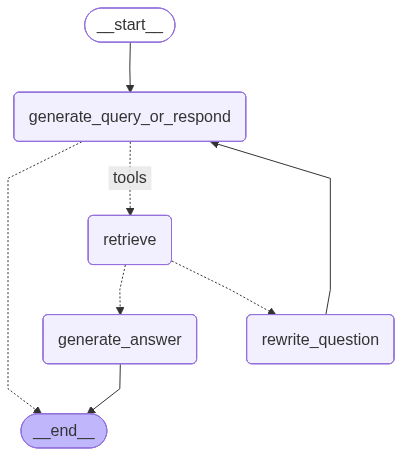

In [21]:
graph

In [88]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is the fee structure for btech ?",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (9rqs5xeyy)
 Call ID: 9rqs5xeyy
  Args:
    query: B.Tech fee structure



📊 Document relevance grade: yes (Rewrite attempt: 0)
Update from node retrieve
================================= Tool Message =================================
Name: retrieve_blog_posts

FOR ALL TYPES OF FEE PAYMENT: 
Go to the following website: 
https://www.eduqfix.com/PayDirect/#/student/pay/t+znLqq9NN80kSDUbCcHUO0LBiDHTDPPrm8m
NpJ2Q20G4MMoUQeHOednJZ6B7lAy/354 
Select Branch as C. V. Raman Global University. 
Choose University Roll Number or Registration Number. 
Your profile details (such as name, program, and division) will be displayed. 
Select the fee type, enter the fee amount, and click Continue to proceed with the payment. 
             Tuition Fee Structure 
               BTech 
Program Branch Fee Per Semester Duration 
BTech Computer Sc. 
Engin

In [89]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "MID Term Examination of 6th Semester CSE & its Allied Branches.",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_examination_cell_doc (mv4cpwn61)
 Call ID: mv4cpwn61
  Args:
    query: MID Term Examination of 6th Semester CSE & its Allied Branches



📊 Document relevance grade: yes (Rewrite attempt: 0)
Update from node retrieve
================================= Tool Message =================================
Name: retrieve_examination_cell_doc

--- Page 1 ---
Here is a detailed summary of the provided document page:

**Institution:** C.V. RAMAN GLOBAL UNIVERSITY, BHUBANESWAR
**Reference Number:** CGU/EXAM/0111 /2025
**Date:** 27.12.2025

**Heading:** NOTICE

**Subject:** Conduct of MID Term Examination of 6th Semester CSE & its Allied Branches.

**Notification Content:**
This notice informs all concerned that the MID Term Examination for the 6th Semester CSE and its Allied Branches will be held on 31.12.2025 (Wednesday) from 11:30 AM to 12:30 PM.

**Exa

In [90]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "Give me detail Academic Calendar-even Sem-2025-26",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  retrieve_notice_board_doc (g3t8twj9h)
 Call ID: g3t8twj9h
  Args:
    query: Academic Calendar even Sem 2025-26



📊 Document relevance grade: yes (Rewrite attempt: 0)
Update from node retrieve
================================= Tool Message =================================
Name: retrieve_notice_board_doc

--- Page 1 ---
Here is a detailed, factual summary of the provided document page:

**Document Title:** C. V. Raman Global University, Bhubaneswar
**Academic Calendar:** 2025-26
**Target Audience:** For 4th/6th/8th Semester Students

**Headings:**

*   Events
*   For all UG/PG/Ph.D Programmes
*   STARTING DATE OF CLASSROOM ACTIVITY
*   MID-SEM EXAMS
*   CLOSING DATE OF CLASSROOM ACTIVITIES
*   END SEMESTER EXAMINATION
*   Month
*   Number of instructional days (month wise)

**Table 1: Events and Dates**

| Event                                      

In [ ]:
# from langgraph.checkpoint.postgres.aio import AsyncPostgresSaver
# import os
# DB_URI = os.getenv("DATABASE_URL")

# async def setup_checkpoint_db():
#     async with AsyncPostgresSaver.from_conn_string(DB_URI) as checkpointer:
#         await checkpointer.setup()
#         print("✅ Checkpoint tables created")

# await setup_checkpoint_db()

: 

: 

In [ ]:
from langgraph.checkpoint.postgres.aio import AsyncPostgresSaver
import os
DB_URI = os.getenv("DATABASE_URL")

async def main():
    # Keep the connection open while streaming
    async with AsyncPostgresSaver.from_conn_string(DB_URI) as checkpointer:
        # Compile with the active checkpointer
        graph = workflow.compile(checkpointer=checkpointer)
        
        config = {"configurable": {"thread_id": "3"}}
        inputs = {"messages": [{"role": "user", "content": "MID Term Examination of 6th Semester CSE & its Allied Branches."}]}

        # Use astream for asynchronous streaming
        async for chunk in graph.astream(inputs, config, stream_mode="updates"):
            for node, update in chunk.items():
                print(f"\n--- Update from node: {node} ---")
                if "messages" in update:
                    update["messages"][-1].pretty_print()

await main()


--- Update from node: generate_query_or_respond ---
================================== Ai Message ==================================
Tool Calls:
  retrieve_blog_posts (thr3czzmj)
 Call ID: thr3czzmj
  Args:
    query: Mtech fee structure C.V. Raman Global University, Odisha, Bhubaneswar, India.
📊 Document relevance grade: no (Rewrite attempt: 0)

--- Update from node: retrieve ---
================================= Tool Message =================================
Name: retrieve_blog_posts

FOR ALL TYPES OF FEE PAYMENT: 
Go to the following website: 
https://www.eduqfix.com/PayDirect/#/student/pay/t+znLqq9NN80kSDUbCcHUO0LBiDHTDPPrm8m
NpJ2Q20G4MMoUQeHOednJZ6B7lAy/354 
Select Branch as C. V. Raman Global University. 
Choose University Roll Number or Registration Number. 
Your profile details (such as name, program, and division) will be displayed. 
Select the fee type, enter the fee amount, and click Continue to proceed with the payment. 
             Tuition Fee Structure 
               B